# Sistemas de ecuaciones diferenciales lineales

## Ejemplo 1: Eigenvalores distintos, Sección 8.2 Zill 9na edicion

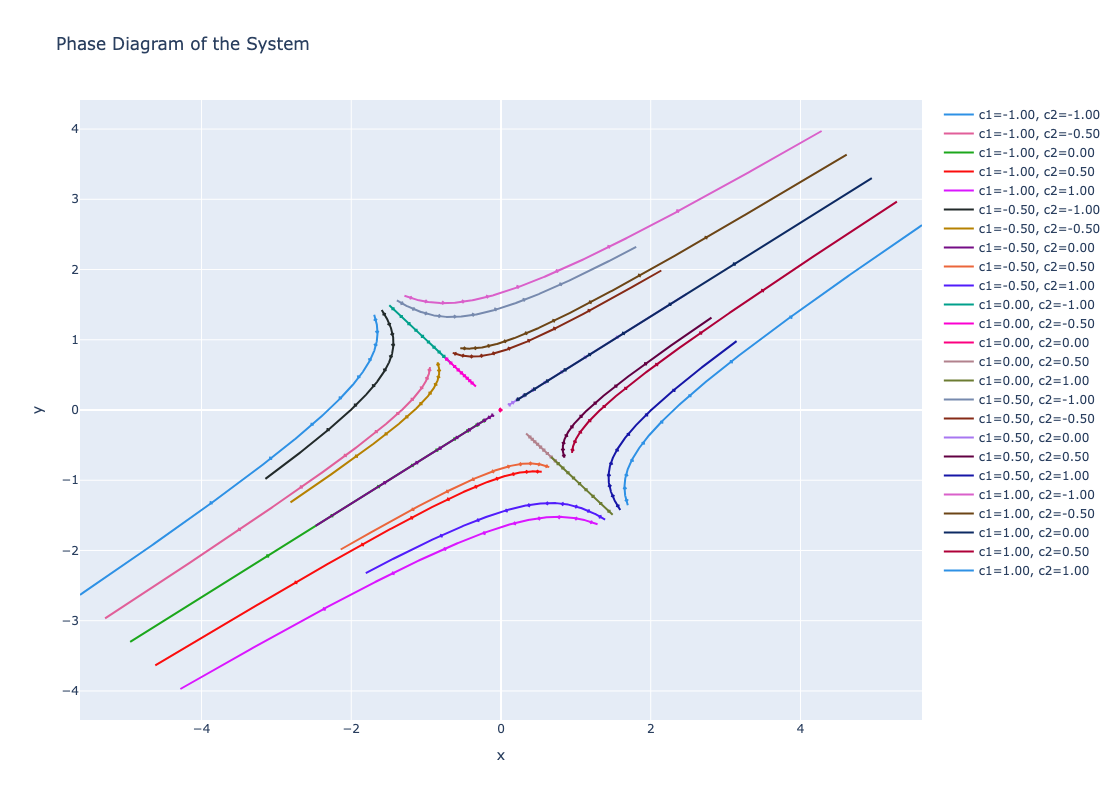

In [23]:
import numpy as np
import plotly.graph_objs as go
import pandas as pd

# Define the reduced time range for the plot
t = np.linspace(-0.4, 0.4, 400)

# Define the constants c1 and c2
c1_values = np.linspace(-1, 1, 5)
c2_values = np.linspace(-1, 1, 5)

# Define a list of colors for the trajectories
colors = px.colors.qualitative.Dark24

# Initialize lists to hold the x, y, and labels
traces = []

# Generate and plot trajectories for different initial conditions
color_idx = 0
for c1 in c1_values:
    for c2 in c2_values:
        x = c1 * np.exp(4 * t) + c2 * np.exp(-t)
        y = (2/3) * c1 * np.exp(4 * t) - c2 * np.exp(-t)
        
        # Add the main trajectory
        trace = go.Scatter(
            x=x, y=y, mode='lines', 
            line=dict(color=colors[color_idx % len(colors)]),
            name=f'c1={c1:.2f}, c2={c2:.2f}'
        )
        traces.append(trace)
        
        # Add arrow markers along the trajectory
        arrow_interval = 40  # Add an arrow every 20 time steps
        for i in range(0, len(t) - arrow_interval, arrow_interval):
            x_mid = (x[i] + x[i + arrow_interval]) / 2
            y_mid = (y[i] + y[i + arrow_interval]) / 2
            u = x[i + arrow_interval] - x[i]
            v = y[i + arrow_interval] - y[i]
            angle = np.arctan2(v, u)
            arrow_x = [
                x_mid, 
                x_mid - 0.03 * np.cos(angle + np.pi / 4), 
                x_mid, 
                x_mid - 0.03 * np.cos(angle - np.pi / 4)
            ]
            arrow_y = [
                y_mid, 
                y_mid - 0.03 * np.sin(angle + np.pi / 4), 
                y_mid, 
                y_mid - 0.03 * np.sin(angle - np.pi / 4)
            ]
            arrow_trace = go.Scatter(
                x=arrow_x, y=arrow_y,
                mode='lines',
                line=dict(color=colors[color_idx % len(colors)], width=2),
                showlegend=False
            )
            traces.append(arrow_trace)
        
        color_idx += 1

# Define the layout
layout = go.Layout(
    title='Phase Diagram of the System',
    xaxis=dict(title='x'),
    yaxis=dict(title='y'),
    showlegend=True,
    width=1000,  # Set the width of the plot
    height=800   # Set the height of the plot
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the plot
fig.show()


### Terminología
* Las líneas obtenidas para una $c_1$ y una $c_2$ dadas, se llama trayectoria.
* Al conjunto de trayectorias se lo denomina diagrama de fase.

### Observaciones
* Si pensamos en términos físicos, las flechas indican la dirección con que una partícula en el tiempo $t$ se mueve conforme aumenta el tiempo.
* Notar que, con excepción de las semi-rectas del segundo y cuarto cuadrante, todas las trayectorias se alejan del origen.

### Comportamiento para $t\to -\infty$ y $t \to \infty$

Recordando que $x = c_1 e^{4t} + c_2 e^{-t}$ y $y = \frac{2}{3} c_1 e^{4t} - c_2 e^{-t}$, por lo tanto

\begin{equation}
X = c_1 \begin{pmatrix} 1 \\ \frac{2}{3} \end{pmatrix} e^{4t} + c_2 \begin{pmatrix} 1 \\ -1 \end{pmatrix} e^{-t} = c_1 X_1 + c_2 X_2,
\end{equation}

y podemos concluir que:
* Para $t \to -\infty$ $\implies$ $X_1$ es despreciable (ya que $e^{4t}$ es despreciable para $t\to -\infty$). Entonces, decimos que la solución "comienza" asíntotica a una de las semirrectas definida por $\gamma X_2$ o $-\gamma X_2$, donde $\gamma > 0$.
* Para $t \to \infty$ $\implies$ $X_2$ es despreciable (ya que $e^{-t}$ es despreciable para $t\to \infty$). Entonces, decimos que la solución se "desvanece" asintótica a una de las semirrectas dadas por $\gamma X_1$ o $-\gamma X_1$, donde $\gamma > 0$.

### Más observaciones
* El diagrama de fase mostrado es característico de *todos* los sistemas lineales homogéneos 2x2 con autovalores reales de signos opuestos.
* Lo único que cambia para otras combinaciones de $\lambda_1$ y $\lambda_2$ son el sentido de las flechas.

### Estabilidad y el rol de los autovalores
* Decimos que el origen es un **repulsor** cuando $\lambda_1 > 0$ *y* $\lambda_2 > 0$ y el sistema es **inestable**.
* Decimos que el origen es un **atractor** cuando $\lambda_1 < 0$ *y* $\lambda_2 < 0$ y el sistema es **estable**.
* Decimos que el origen es un **punto de silla** cuando los autovalores tienen signos opuestos y el sistema es intrínsecamente **inestable** porque:
   *  Pequeñas perturbaciones en la dirección asociada con el autovalor positivo van a crecer.
   *  **Sólo** perturbacione exactamente ubicadas sobre la dirección del autovalor negativo van a decaer hacia el origen (punto de silla).  